In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
sns.set_theme(style="whitegrid", palette="pastel")

df = pd.read_csv("22_CSI100.csv")

In [2]:
from datetime import datetime
df['date'] = pd.to_datetime(df['date'].astype(str), format='%Y/%m/%d')
df.head(5)

,Unnamed: 0,date,instrument,ROE,Free_Cash_Flow,PE_TTM,market_cap,amount,open,close
0,0,2022-01-04,000002.SZA,7.3822,-2.057795e+10,6.212694,2.382040e+11,3956475666,3171.7524,3334.4897
1,1,2022-01-05,000002.SZA,7.3822,-2.057795e+10,6.418874,2.461090e+11,4075047844,3324.7256,3445.1514
2,2,2022-01-06,000002.SZA,7.3822,-2.057795e+10,6.382490,2.447140e+11,2923511291,3437.0144,3425.6228
3,3,2022-01-07,000002.SZA,7.3822,-2.057795e+10,6.637183,2.544800e+11,4969780143,3479.3262,3562.3223
4,4,2022-01-10,000002.SZA,7.3822,-2.057795e+10,6.719049,2.576180e+11,3376585470,3547.6758,3606.2612


In [3]:
df.columns

Index(['Unnamed: 0', 'date', 'instrument', 'ROE', 'Free_Cash_Flow', 'PE_TTM',
       'market_cap', 'amount', 'open', 'close'],
      dtype='object')

<Axes: xlabel='instrument', ylabel='market_caps'>

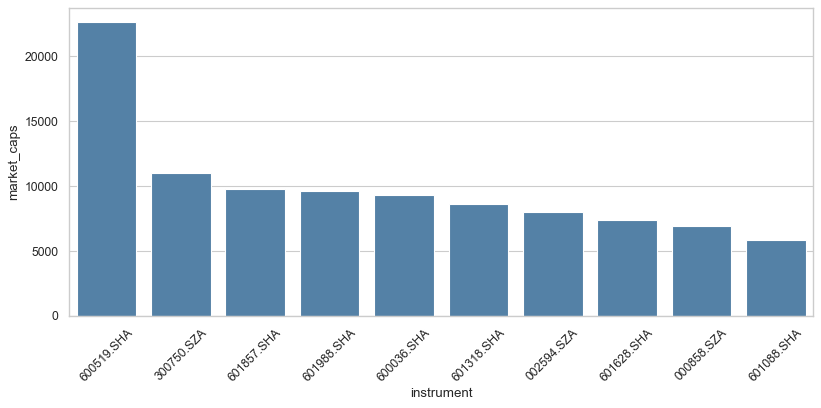

In [4]:
stock_codes = df.instrument.unique()
market_caps =[]
amounts = []
cash_flows = [] 
ROEs = []
for c in stock_codes:
    market_cap = df[df['instrument']==c].market_cap.mean()
    amount= df[df['instrument']==c].amount.mean()
    cash_flow = df[df['instrument']==c].Free_Cash_Flow.mean()
    ROE = df[df['instrument']==c].ROE.mean()
    market_caps.append(round(market_cap/100000000,2))
    amounts.append(round(amount/100000000,2))
    cash_flows.append(round(cash_flow/100000000,2))
    ROEs.append(ROE)
df_mc = pd.DataFrame({'instrument':stock_codes,'market_caps':market_caps,'amounts':amounts,
                      'cash_flows':cash_flows,'ROEs':ROEs})
figure(figsize=(12, 5), dpi=80)
plt.xticks(rotation=45)
df_mc.sort_values(by="market_caps",inplace=True,ascending=False)
sns.barplot(data=df_mc.iloc[:10],x='instrument',y='market_caps',color='steelblue')

<Axes: xlabel='instrument', ylabel='amounts'>

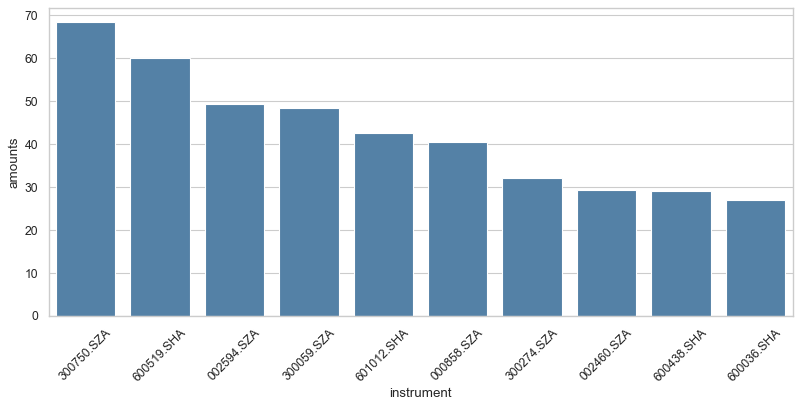

In [5]:
figure(figsize=(12, 5), dpi=80)
plt.xticks(rotation=45)
df_mc.sort_values(by="amounts",inplace=True,ascending=False)
sns.barplot(data=df_mc.iloc[:10],x='instrument',y='amounts',color='steelblue')

<Axes: xlabel='instrument', ylabel='cash_flows'>

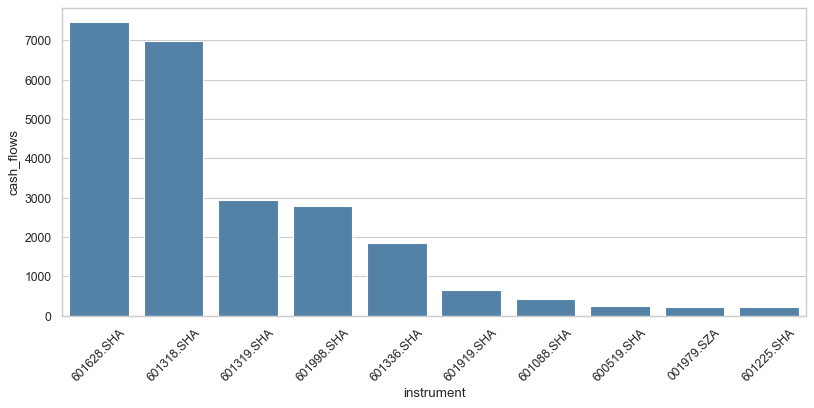

In [6]:
figure(figsize=(12, 5), dpi=80)
plt.xticks(rotation=45)
df_mc.sort_values(by="cash_flows",inplace=True,ascending=False)
sns.barplot(data=df_mc.iloc[:10],x='instrument',y='cash_flows',color='steelblue')

<Axes: xlabel='instrument', ylabel='ROEs'>

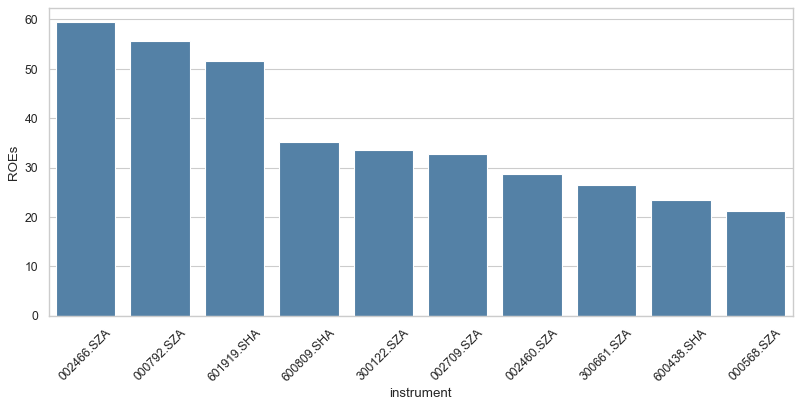

In [7]:
figure(figsize=(12, 5), dpi=80)
plt.xticks(rotation=45)
df_mc.sort_values(by="ROEs",inplace=True,ascending=False)
sns.barplot(data=df_mc.iloc[:10],x='instrument',y='ROEs',color='steelblue')